# Greedy Jigsaw Puzzle

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [140]:
def genPuzzle(h=5, w=7, size=4):
    nx, ny = (size*w, size*h)
    baseImg = np.zeros((ny,nx))
    n=0
    for x in range(nx):
        for y in range(ny):
            baseImg[y,x]=n
            n+=1
    #x = np.linspace(0, 1000, nx)
    #y = np.linspace(0, 1, ny)
    #xv, yv = np.meshgrid(x, y)
    #baseImg = xv+yv
    baseImg /= baseImg.max()
    
    allImgs = np.zeros((h*w,size,size))
    
    n=0
    for y in range(h-1):
        for x in range(w-1):
            t = baseImg[size*y:size*y+size, size*x:size*x+size]
            allImgs[n] = baseImg[size*y:size*y+size, size*x:size*x+size]
            n+=1
    
    return allImgs, baseImg

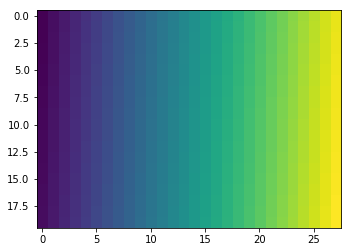

In [141]:
puzzle, bi=genPuzzle()
plt.imshow(bi)
#plt.imshow(puzzle[20], vmin=0, vmax=1)

In [142]:
puzzle[0]

array([[0.        , 0.03577818, 0.07155635, 0.10733453],
       [0.00178891, 0.03756708, 0.07334526, 0.10912343],
       [0.00357782, 0.03935599, 0.07513417, 0.11091234],
       [0.00536673, 0.0411449 , 0.07692308, 0.11270125]])

In [143]:
def tryMatch(imgs, idToMatch, place='right', match_size=1):
    '''
    try to match an image at the place position
    
    match_size - match using how many rows/columns?
    
    imgs[n, h, w]
    '''
    
    if place=='right':
        orig_crop = imgs[idToMatch, :, -match_size:]
        cand_crop = imgs[:, :, 0:match_size]
        orig_crop = np.mean(orig_crop, axis=1)
        cand_crop = np.mean(cand_crop, axis=2)
    elif place=='left':
        orig_crop = imgs[idToMatch, :, 0:match_size]
        cand_crop = imgs[:, :, -match_size:]
        orig_crop = np.mean(orig_crop, axis=1)
        cand_crop = np.mean(cand_crop, axis=2)
    elif place=='bottom':
        orig_crop = imgs[idToMatch, -match_size:, :]
        cand_crop = imgs[:, 0:match_size, :]
        orig_crop = np.mean(orig_crop, axis=0)
        cand_crop = np.mean(cand_crop, axis=1)
    elif place=='top':
        orig_crop = imgs[idToMatch, 0:match_size, :]
        cand_crop = imgs[:, -match_size:, :]
        orig_crop = np.mean(orig_crop, axis=0)
        cand_crop = np.mean(cand_crop, axis=1)
    
    
    cand_crop -= orig_crop
    cand_error = np.mean(np.square(cand_crop),axis=1)
    #cand_error = np.mean(np.abs(cand_crop),axis=1)
    #cand_error = np.max(np.square(cand_crop),axis=1)

    cand_order = np.argsort(cand_error)
    return cand_order, cand_error

In [144]:
idMatch=2
puzzle[idMatch]

array([[0.2862254 , 0.32200358, 0.35778175, 0.39355993],
       [0.28801431, 0.32379249, 0.35957066, 0.39534884],
       [0.28980322, 0.3255814 , 0.36135957, 0.39713775],
       [0.29159213, 0.3273703 , 0.36314848, 0.39892665]])

In [145]:
puzzle[1]

array([[0.1431127 , 0.17889088, 0.21466905, 0.25044723],
       [0.14490161, 0.18067979, 0.21645796, 0.25223614],
       [0.14669052, 0.18246869, 0.21824687, 0.25402504],
       [0.14847943, 0.1842576 , 0.22003578, 0.25581395]])

In [147]:
order, error = tryMatch(puzzle, idMatch, place='left')
order

array([19, 13,  7,  1,  2,  8, 14, 20, 18, 12,  6,  0,  3,  9, 15, 21, 27,
       29, 26, 30, 31, 32, 28, 25, 34, 33, 24,  4, 10, 16, 22,  5, 11, 17,
       23], dtype=int64)

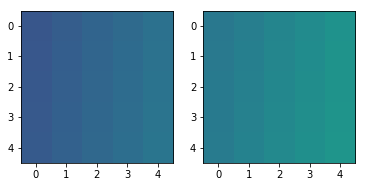

In [100]:
plt.subplot(1,2,1)
plt.imshow(puzzle[idMatch], vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(puzzle[order[0]], vmin=0, vmax=1)

In [148]:
puzzle[idMatch]

array([[0.2862254 , 0.32200358, 0.35778175, 0.39355993],
       [0.28801431, 0.32379249, 0.35957066, 0.39534884],
       [0.28980322, 0.3255814 , 0.36135957, 0.39713775],
       [0.29159213, 0.3273703 , 0.36314848, 0.39892665]])

In [149]:
puzzle[order[0]]

array([[0.16457961, 0.20035778, 0.23613596, 0.27191413],
       [0.16636852, 0.20214669, 0.23792487, 0.27370304],
       [0.16815742, 0.2039356 , 0.23971377, 0.27549195],
       [0.16994633, 0.20572451, 0.24150268, 0.27728086]])

In [150]:
puzzle[1]

array([[0.1431127 , 0.17889088, 0.21466905, 0.25044723],
       [0.14490161, 0.18067979, 0.21645796, 0.25223614],
       [0.14669052, 0.18246869, 0.21824687, 0.25402504],
       [0.14847943, 0.1842576 , 0.22003578, 0.25581395]])